# Python for Data Journalists MOOC participant analysis

By Ben Welsh

## Import Python tools

In [158]:
import bs4
import numpy as np
import pandas as pd
from iso3166 import countries as iso3166

In [159]:
%matplotlib inline

In [160]:
pd.options.display.max_rows = None

### Read in and parse student roster

The source data file has been omitted from this repository to protect the privacy of students.

In [161]:
html = open("./input/PDJ0517_ Participants.html", 'r').read()

In [162]:
soup = bs4.BeautifulSoup(html, "html5lib")

In [163]:
table = soup.find("table", id="participants")

In [164]:
raw_rows = table.find_all("tr")

In [165]:
def parse_row(row):
    cells = row.find_all("td")
    data = {}
    data['image'] = cells[1].img['src']
    data['detail_url'] = cells[2].a['href']
    data['name'] = cells[2].a.text or np.NaN
    data['city'] = cells[3].text
    data['country'] = cells[4].text or np.NaN
    return data

In [166]:
parsed_rows = [parse_row(r) for r in raw_rows[1:] if r['class'] != [u'emptyrow',]]

### Load the roster in to pandas for analysis 

In [167]:
df = pd.DataFrame(parsed_rows)

### How many students are there?

In [168]:
len(df)

2740

### Which countries have sent the most students?

In [169]:
countries = df.groupby("country").agg(dict(detail_url="count")).reset_index()

In [170]:
df.country.describe()

count              2737
unique              122
top       United States
freq               1064
Name: country, dtype: object

In [171]:
countries.columns = ['name', 'total']

In [172]:
countries['percent'] = countries.total / countries.total.sum()

In [173]:
def get_code(name):
    try:
        return iso3166.get(name.strip()).alpha3
    except KeyError:
        if name == 'United Kingdom':
            return iso3166.get("GB").alpha3
        return np.NaN

In [174]:
countries['code'] = countries.name.apply(get_code)

In [175]:
countries.sort_values("total", ascending=False).head(20)

,name,total,percent,code
117,United States,1064,0.388747,USA
16,Brazil,319,0.116551,BRA
100,Spain,104,0.037998,ESP
116,United Kingdom,87,0.031787,GBR
67,Mexico,81,0.029594,MEX
48,India,70,0.025575,IND
39,Germany,63,0.023018,DEU
21,Canada,62,0.022653,CAN
3,Argentina,52,0.018999,ARG
76,Nigeria,39,0.014249,NGA


In [176]:
countries.total.describe()

count     122.000000
mean       22.434426
std       100.706183
min         1.000000
25%         2.000000
50%         3.500000
75%        13.000000
max      1064.000000
Name: total, dtype: float64

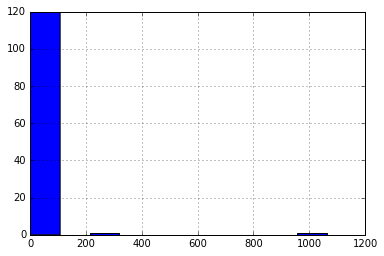

In [177]:
countries.total.hist()

In [178]:
countries.to_csv("./output/mooc-countries.csv", index=False, encoding="utf-8")

### Which locations within countries have sent the most students?

In [179]:
locations = df.groupby("city").agg(dict(detail_url="count")).reset_index()

In [180]:
df.city.describe()

count     2740
unique    1032
top           
freq       513
Name: city, dtype: object

In [181]:
locations.columns = ["name", "total"]

In [182]:
locations['percent'] = locations.total / locations.total.sum()

In [183]:
locations.sort_values("total", ascending=False).head(20)

,name,total,percent
0,,513,0.187226
817,São Paulo,46,0.016788
467,London,41,0.014964
579,New York,41,0.014964
487,Madrid,33,0.012044
476,Los Angeles,31,0.011314
697,Rio de Janeiro,27,0.009854
56,Austin,27,0.009854
896,Washington,22,0.008029
735,San Francisco,22,0.008029
